# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents.

In [2]:
data = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

In [3]:
df = data.copy()

In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [5]:
df.sample(5)

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
9490,"FROBES, JAMES J",SUPERVISING BRIDGE OPERATOR,TRANSPORTN,F,Salary,NaN,84384.0,NaN
9714,"GALLEGOS, ALVARO",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
6769,"DE BOER, DENNIS M",AVIATION SECURITY OFFICER,AVIATION,F,Salary,NaN,64392.0,NaN
25816,"RUFF, KENNETH J",POLICE OFFICER,POLICE,F,Salary,NaN,80016.0,NaN
31280,"WARREN, MICHELLE M",MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.6


Examine the `salaries` dataset using the `head` function below.

In [6]:
df["annual_salary"].head()



0    101442.0
1     94122.0
2    101592.0
3    110064.0
4         NaN
Name: annual_salary, dtype: float64

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [7]:
df.isnull().sum()



name                     0
job_titles               0
department               0
full_or_part-time        0
salary_or_hourly         0
typical_hours        25161
annual_salary         8022
hourly_rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [8]:
df["salary_or_hourly"].value_counts()



salary_or_hourly
Salary    25161
Hourly     8022
Name: count, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [9]:
df["department"].value_counts()


department
POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [10]:
df.head(1)

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN


In [11]:
import scipy.stats as st

In [12]:
mu = 30
alpha = 0.05

In [13]:
h_workers = df[df["salary_or_hourly"] == "Hourly"][["hourly_rate"]]

In [14]:
h_workers_mean = h_workers.mean()
h_workers_mean

hourly_rate    32.788558
dtype: float64

In [15]:
_ , pvalue = st.ttest_1samp(h_workers, 30)
pvalue

array([4.32302405e-92])

In [16]:
pvalue = pvalue[0]

In [17]:
h0_h_workers = pvalue > alpha
h0_h_workers

#Al ser falso revela que pvalue es menor que alfa, por lo que rechazamos la hipotesis nula

False

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [18]:
s_workers = df[df["salary_or_hourly"] == "Salary"][["annual_salary"]]

In [19]:
s_workers

,annual_salary
0,101442.0
1,94122.0
2,101592.0
3,110064.0
5,50436.0
...,...
33178,72510.0
33179,48078.0
33180,90024.0
33181,93354.0


In [20]:
s_workers_mean = s_workers.mean()
s_workers_mean

annual_salary    86786.99979
dtype: float64

In [21]:
_ , pvalue2 = st.ttest_1samp(s_workers, 86000, alternative="greater")
pvalue2 = pvalue2[0]
pvalue2

1.507879259958193e-09

In [22]:
h0_pol_workers = pvalue2 > alpha
h0_pol_workers #rechazamos la hipótesis ya que p value es menor que alfa

False

Using the `crosstab` function, find the department that has the most hourly workers. 

In [23]:
most_hw_dept = pd.crosstab(df["department"],df["salary_or_hourly"])
most_hw_dept.sort_values(by="Hourly", ascending=False, inplace=True)
most_hw_dept.head(3)

salary_or_hourly,Hourly,Salary
department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [24]:
w_street = df[(df["department"] == "STREETS & SAN") & (df["salary_or_hourly"] == "Hourly")][["hourly_rate"]]
w_street.shape

(1862, 1)

In [25]:
w_street_mean = w_street.mean()
w_street_mean

hourly_rate    33.728378
dtype: float64

In [26]:
_ , pvalue3 = st.ttest_1samp(w_street, 35, alternative="less")
pvalue3 = pvalue3[0]
pvalue3

1.6689265282353859e-21

In [27]:
h0_w_street = pvalue3 > alpha
h0_w_street #rechazamos la hipótesis ya que p value es menor que alfa

False

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [28]:
df.head(5)

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [29]:
# cojo variable h_workers, filtro que ya saqué en challenge 2

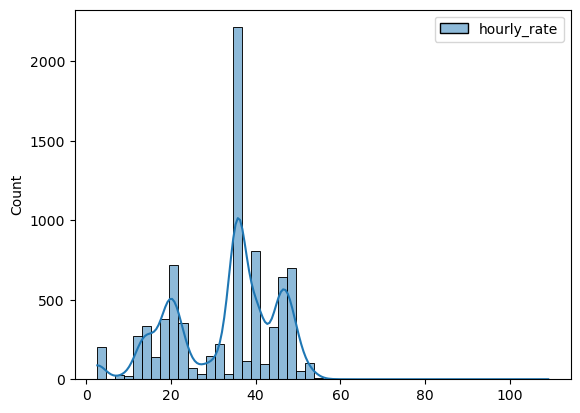

In [45]:
sns.histplot(h_workers, kde=True, bins=50) #histograma con kde para ver la línea de densidad
plt.show()

In [75]:
confidence_h_w = 0.95 #nivel de confianza dado
d_freedom_h_w = len(h_workers) - 1 #grado de libertad = filas - 1
loc_h_w = h_workers.mean() #location parameter es la media del sample
sem_h_w = stats.sem(h_workers) #standard error relacionado con la desviación standard 

In [89]:
#aplicamos fórmula de "confidence interval" en T Distribution
ci_lower_h_w, ci_upper_h_w = stats.t.interval(confidence_h_w, d_freedom_h_w , loc=loc_h_w, scale=sem_h_w)

In [90]:
#sacamos los valores de los arrays con la única posición que tienen
print(f"95% Confidence Interval: [{ci_lower_h_w[0]:.2f}, {ci_upper_h_w[0]:.2f}]")

95% Confidence Interval: [32.52, 33.05]


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [83]:
df.head(1)

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN


In [84]:
pol_w = df[(df["department"]=="POLICE") & (df["salary_or_hourly"] =="Salary")]["annual_salary"]

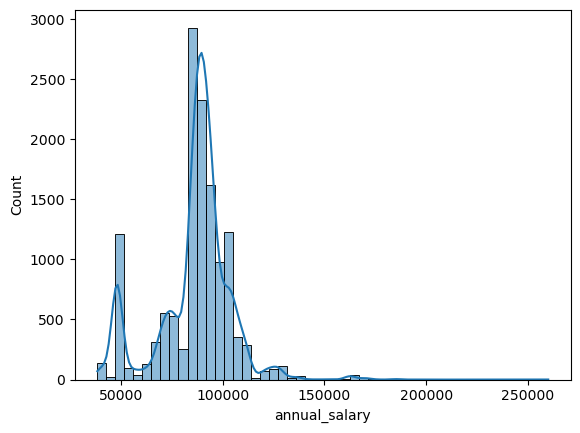

In [87]:
sns.histplot(pol_w, kde=True, bins=50) 
plt.show()

In [88]:
confidence_pol_w = 0.95 #nivel de confianza dado
d_freedom_pol_w = len(pol_w) - 1 #grado de libertad = filas - 1
loc_pol_w = pol_w.mean() #location parameter es la media del sample
sem_pol_w = stats.sem(pol_w) #standard error relacionado con la desviación standard 

In [93]:
#aplicamos fórmula de "confidence interval" en T Distribution
ci_lower_pol_w, ci_upper_pol_w = stats.t.interval(confidence_pol_w, d_freedom_pol_w, loc=loc_pol_w, scale=sem_pol_w)

In [95]:
#sacamos los valores de los arrays con la única posición que tienen
print(f"95% Confidence Interval: [{ci_lower_pol_w:.2f}, {ci_upper_pol_w:.2f}]")

95% Confidence Interval: [86177.06, 86795.77]


# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [31]:
# Your code here:

